In [1]:
%pylab inline
from mpl_toolkits.basemap import Basemap
import geojson
import matplotlib.cm as cm
from os.path import expanduser

Populating the interactive namespace from numpy and matplotlib


Get the data file at http://mbsandbox.org/~mineo/places/places.json and enter the path to the file downloaded here

In [2]:
DATA_PATH = expanduser("~/Downloads/places.json")

Load the data file and extract longitudes and latitudes

In [3]:
with open(DATA_PATH, "r") as fp:
    data = geojson.load(fp)

def coord_getter(feature):
    coords = feature["geometry"]["coordinates"]
    return (coords[0], coords[1])

coords = [coord_getter(f) for f in data["features"]]
lons = np.array([c[0] for c in coords])
lats = np.array([c[1] for c in coords])

And now, draw the whole thing

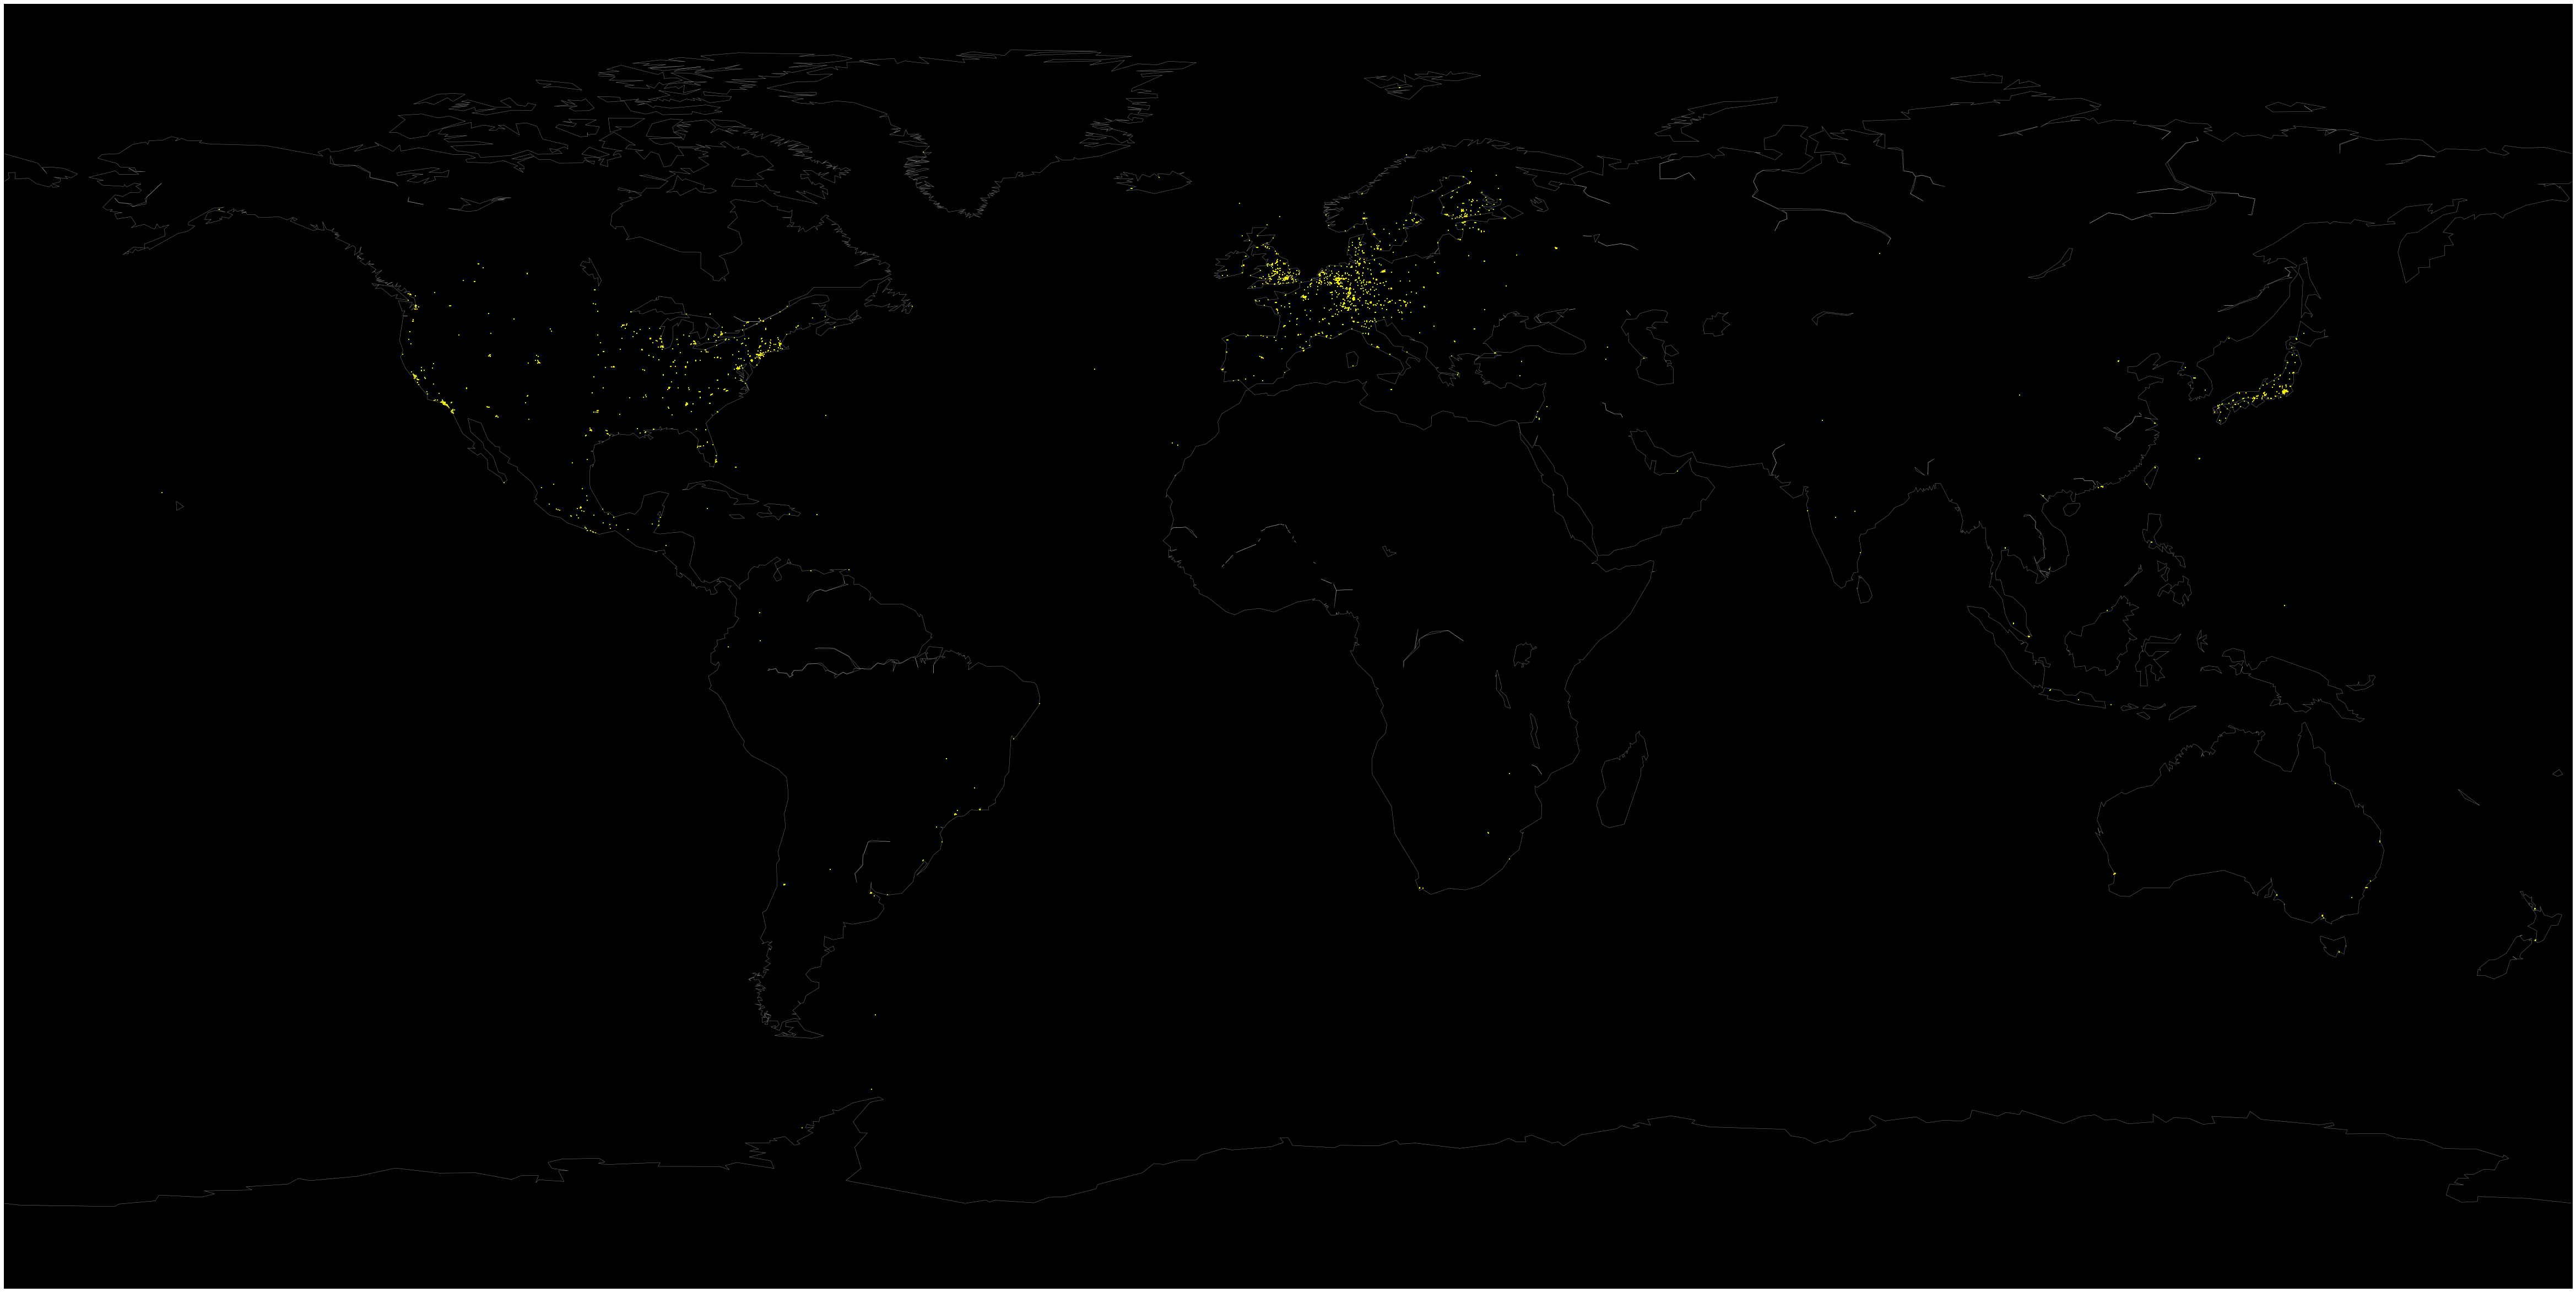

In [4]:
m = Basemap()
m.drawcoastlines(color='gray', linewidth=.5)
ax = plt.gca()
ax.set_axis_bgcolor('black')
fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(72, 35)
m.scatter(lons, lats, color='yellow', marker='.', s=5)
# Uncomment the next line to save the figure
# savefig(expanduser('~/places-scatter.svg'), bbox_inches='tight')